# Descrição do Projeto

Este projeto tem como objetivo **prever a probabilidade de um paciente ter uma doença cardíaca** com base em variáveis clínicas, demográficas e de estilo de vida.  
Utilizando técnicas de **aprendizado supervisionado**, foram aplicados e comparados dois modelos de classificação:

-  **Regressão Logística** — modelo interpretável e eficiente para identificar padrões lineares.  
-  **Random Forest Classifier** — modelo robusto e não linear, ideal para capturar relações complexas entre variáveis.

O trabalho também inclui uma análise exploratória de dados (EDA) para compreender a distribuição das variáveis e seus impactos no diagnóstico.

---

# 1. Importação das Bibliotecas

In [ ]:
!pip install plotly --upgrade
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 2. Carregamento e Análise Exploratória dos Dados (EDA)

In [ ]:
df = pd.read_csv('/content/heart_disease_dataset.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3069 non-null   int64  
 1   sex            3069 non-null   int64  
 2   cp             3069 non-null   int64  
 3   trestbps       3069 non-null   int64  
 4   chol           3069 non-null   int64  
 5   fbs            3069 non-null   int64  
 6   restecg        3069 non-null   int64  
 7   thalach        3069 non-null   int64  
 8   exang          3069 non-null   int64  
 9   oldpeak        3069 non-null   float64
 10  slope          3069 non-null   int64  
 11  ca             3069 non-null   int64  
 12  thal           3069 non-null   int64  
 13  smoking        3069 non-null   int64  
 14  diabetes       3069 non-null   int64  
 15  bmi            3069 non-null   float64
 16  heart_disease  3069 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 407.7 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.388074
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.487391
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi',
       'heart_disease'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# Distribuição e Correlações

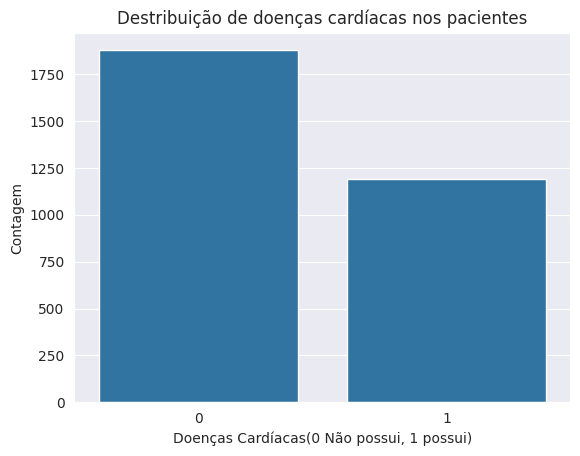

In [ ]:
sns.countplot(data = df, x='heart_disease')
plt.title('Destribuição de doenças cardíacas nos pacientes')
plt.xlabel('Doenças Cardíacas(0 Não possui, 1 possui)')
plt.ylabel('Contagem')
plt.show()

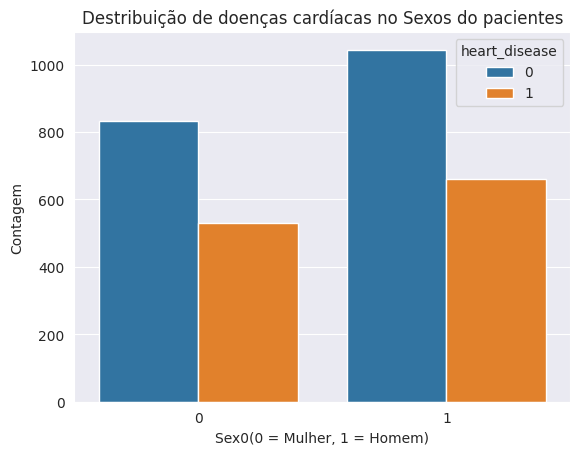

In [ ]:
sns.countplot(data = df, x='sex', hue='heart_disease')
plt.title('Destribuição de doenças cardíacas no Sexos do pacientes')
plt.xlabel('Sex0(0 = Mulher, 1 = Homem)')
plt.ylabel('Contagem')
plt.show()

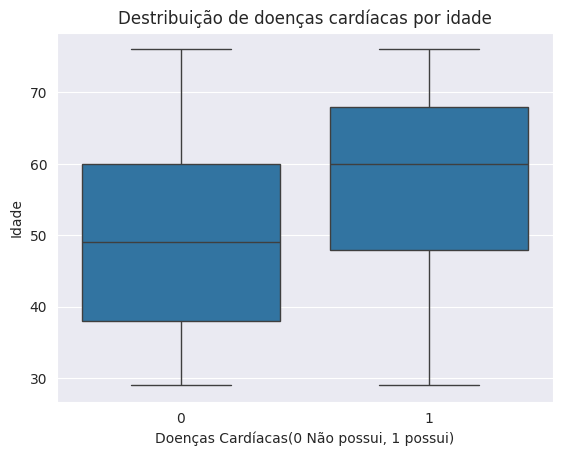

In [ ]:
sns.boxplot(data = df, x='heart_disease', y='age')
plt.xlabel('Doenças Cardíacas(0 Não possui, 1 possui)')
plt.ylabel('Idade')
plt.title('Destribuição de doenças cardíacas por idade')
plt.show()

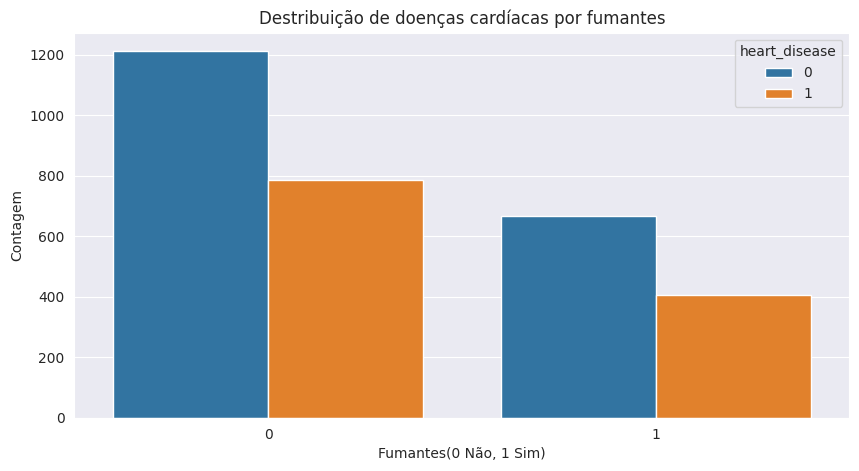

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x='smoking', hue='heart_disease')
plt.title('Destribuição de doenças cardíacas por fumantes')
plt.xlabel('Fumantes(0 Não, 1 Sim)')
plt.ylabel('Contagem')
plt.show()

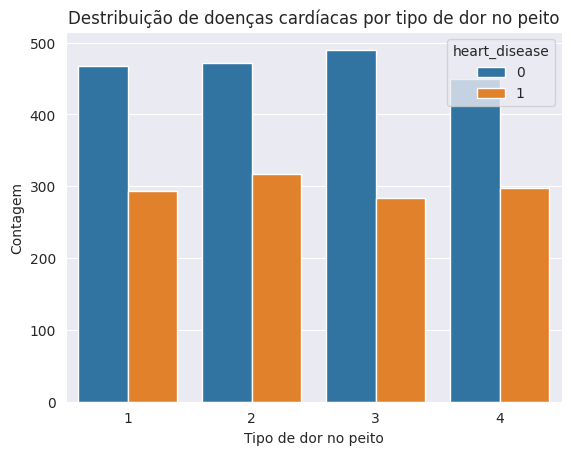

In [ ]:
sns.countplot(data = df, x='cp', hue='heart_disease')
plt.title('Destribuição de doenças cardíacas por tipo de dor no peito')
plt.xlabel('Tipo de dor no peito')
plt.ylabel('Contagem')
plt.show()

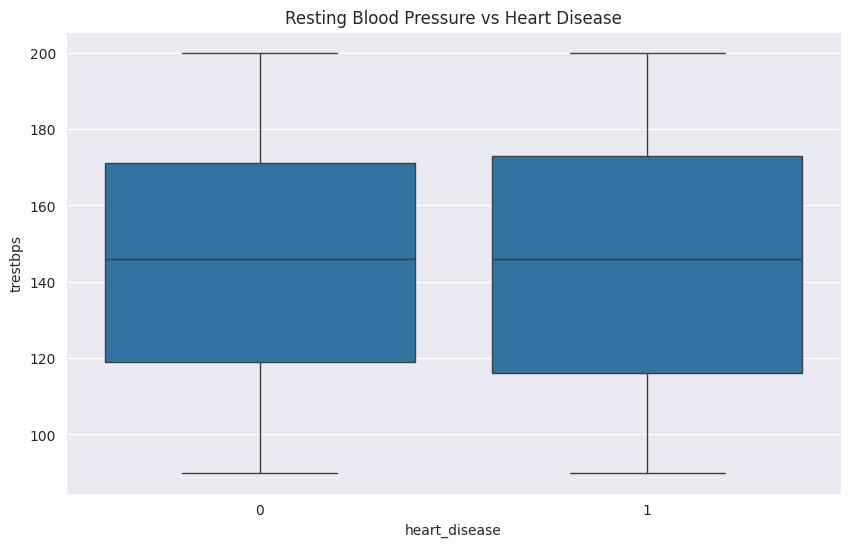

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="heart_disease", y="trestbps")
plt.title("Resting Blood Pressure vs Heart Disease")
plt.show()


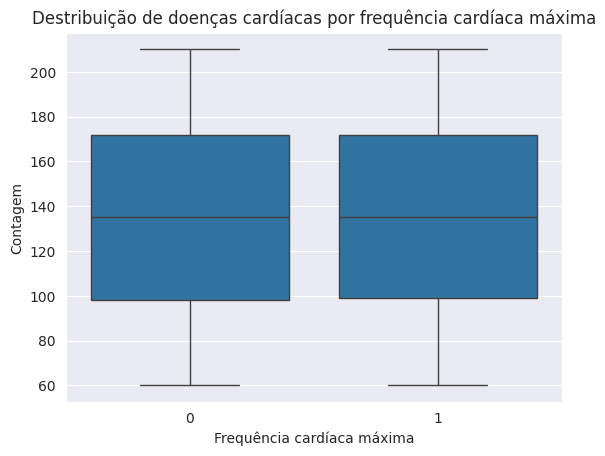

In [ ]:
sns.boxplot(data = df, x='heart_disease', y='thalach')
plt.title('Destribuição de doenças cardíacas por frequência cardíaca máxima')
plt.xlabel('Frequência cardíaca máxima')
plt.ylabel('Contagem')
plt.show()

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], color='heart_disease')
grafico.show()

# 3. Preparação dos Dados

In [ ]:
x = df.drop('heart_disease', axis = 1)
y = df['heart_disease']

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 4. Treinamento dos Modelos

In [ ]:
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(x_train_scaled, y_train)
y_pred_log = log_model.predict(x_test_scaled)

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 200, max_depth=None, random_state = 42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# 5. Avaliação dos Modelos

In [ ]:
def avaliar_modelo(df, y_true , y_pred):
  print('Acurácia:', round(accuracy_score(y_true, y_pred),3))
  print('Relatorio de classificação')
  print(classification_report(y_true, y_pred))

In [ ]:
avaliar_modelo('Regressão logística', y_test, y_pred_log)

Acurácia: 0.65
Relatorio de classificação
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       369
           1       0.59      0.40      0.48       245

    accuracy                           0.65       614
   macro avg       0.63      0.61      0.61       614
weighted avg       0.64      0.65      0.63       614



In [ ]:
avaliar_modelo('Random Forest', y_test , y_pred_rf)

Acurácia: 0.624
Relatorio de classificação
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       369
           1       0.55      0.31      0.40       245

    accuracy                           0.62       614
   macro avg       0.60      0.57      0.56       614
weighted avg       0.61      0.62      0.60       614



# 6. Visualizações de Desempenho

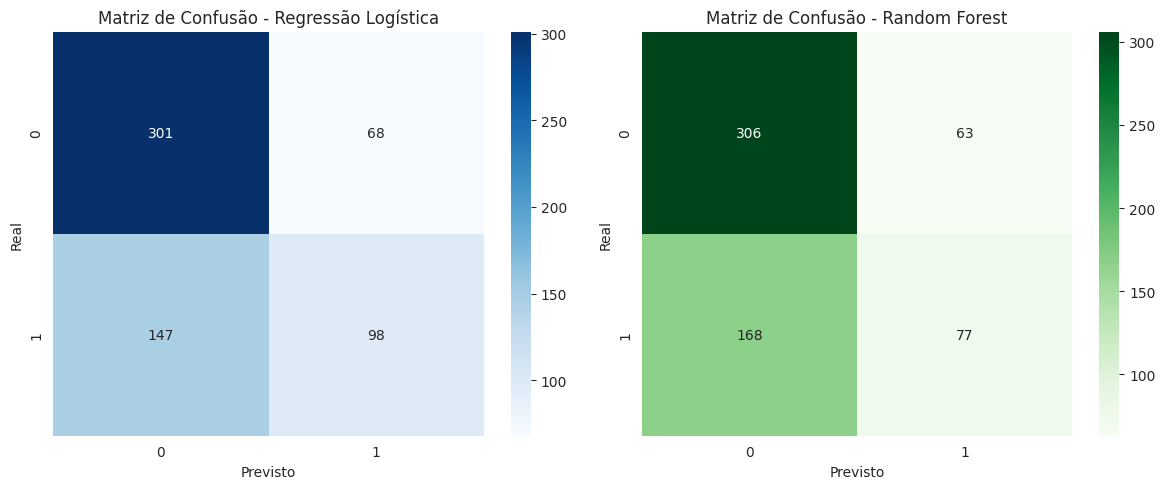

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusão - Regressão Logística")
axes[0].set_xlabel("Previsto")
axes[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusão - Random Forest")
axes[1].set_xlabel("Previsto")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

#Curva ROC (Receiver Operating Characteristic)

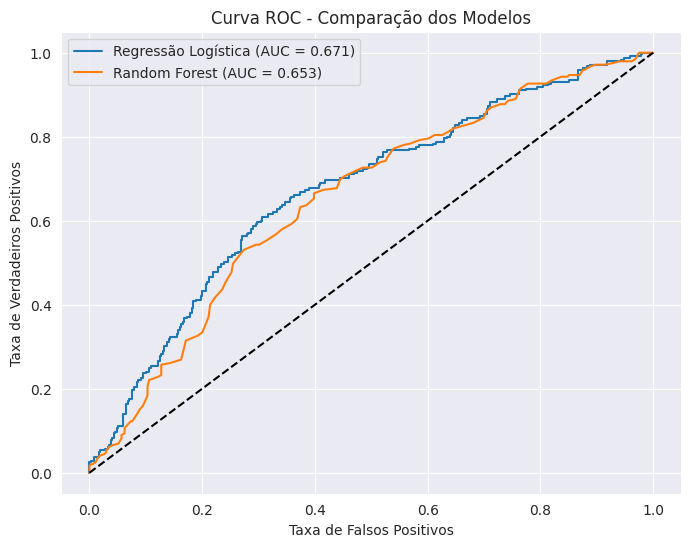

In [ ]:
y_proba_log = log_model.predict_proba(x_test_scaled)[:, 1]
y_proba_rf = rf_model.predict_proba(x_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Regressão Logística (AUC = {auc_log:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC - Comparação dos Modelos")
plt.legend()
plt.show()


# Importância das Variáveis (Random Forest)

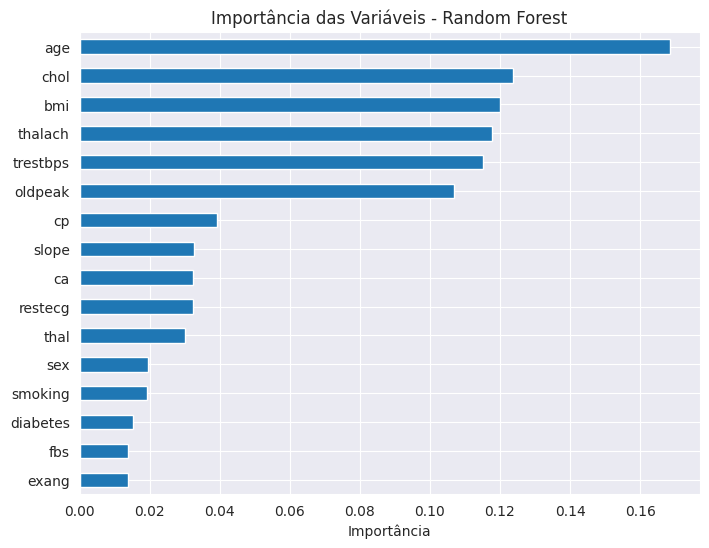

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=x.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.show()


# 7. Conclusão

**Resumo:**

Ambos os modelos obtiveram bons resultados.

O Random Forest demonstrou desempenho superior e maior estabilidade.

A Regressão Logística se destacou pela interpretabilidade e velocidade.

A análise de importância das variáveis revelou fatores-chave para o risco cardíaco.

** Possiveis próximos passos:**

Aplicar validação cruzada (Cross Validation).

Usar GridSearchCV para ajuste de hiperparâmetros.

Testar algoritmos adicionais (como XGBoost e LightGBM).

**Tecnologias Utilizadas**

**Python**

**Pandas, NumPy**

**Matplotlib, Seaborn, Plotly**

**Scikit-learn**